In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = stopwords.words('italian')
stopwords.append("applausi")

C:\Users\fabio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Dato un testo, ritorna l'insieme di token che lo costituisce, ignorando le stopwords
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Zàèéìòù\s]', '', text, flags=re.UNICODE) #rimuovo tutti i caratteri non alfabetici
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords]
    return words

In [3]:
#Informazioni strutturali del dataset
def dataset_structure(df):    
    print("====SHAPE====\n ", df.shape)
    print("\n====DATA TYPES====\n ", df.dtypes)
    print("\n====NULL VALUES====\n ", df.isnull().sum())
    print("\n====DUPLICATES====\n", df.duplicated().sum())

In [4]:
#Informazioni sui testi
def texts_analysis(df):
    print("====TEXT LENGTH INFO====\n", df["text_length"].describe())
    
    #Istogramma della lunghezza dei testi
    plt.figure(figsize=(10,5))
    sns.histplot(df['text_length'], bins=75, kde=True)
    plt.title("Distribution of Speech Lengths")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Frequency")
    plt.show()

    #Calcolo delle parole più frequenti nei testi
    df['tokens'] = df['text'].apply(preprocess_text)
    all_words = [word for tokens in df['tokens'] for word in tokens]
    word_freq = FreqDist(all_words)
    common_words = word_freq.most_common(20)
    print("Most Common Words:")
    print(common_words)
    
    #Barplot delle parole più frequenti
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title("Most Common Words")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()
    
    #Word cloud delle parole più frequenti
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    #Bigrammi più frequenti
    bigrams = list(ngrams(all_words, 2))
    bigram_freq = FreqDist(bigrams)
    common_bigrams = bigram_freq.most_common(20)
    print("Most Common Bigrams:")
    print(common_bigrams)
    

In [5]:
def metadata_analysis(df):
    #Barplot del numero di discorsi per speaker (20 più alti)
    plt.figure(figsize=(12,5))
    df['Speaker_ID'].value_counts().nlargest(20).plot(kind='bar')
    plt.title("Top 20 Most Frequent Speakers")
    plt.xlabel("Speaker")
    plt.ylabel("Number of Speeches")
    plt.xticks(rotation=90)
    plt.show()

    #Barplot del numero di discorsi per partito
    plt.figure(figsize=(15,8))
    sns.countplot(y=df['Speaker_party'], order=df['Speaker_party'].value_counts().index)
    plt.title("Speeches by Party")
    plt.xlabel("Count")
    plt.ylabel("Party")
    plt.xticks(rotation=90)
    plt.show()
    
    #Boxplot della lunghezza dei discorsi per partito
    plt.figure(figsize=(15,8))
    sns.boxplot(x=df['Speaker_party'], y=df['text_length'])
    plt.title("Speech Length Distribution by Party")
    plt.xlabel("Party")
    plt.ylabel("Speech Length (Characters)")
    plt.xticks(rotation=90)
    plt.show()

In [2]:
cond_merged_df = pd.read_csv("data/condensed_dataset/merged.tsv", sep=",", encoding="utf-8")
merged_df = pd.read_csv("data/cleaned_dataset/refined.csv", sep=",", encoding="utf-8")

In [10]:
merged_df.groupby('Speaker_party')['Speaker_ID'].nunique().reset_index()

,Speaker_party,Speaker_ID
0,FI-BP,56
1,FdI,24
2,Lega,68
3,M5S,130
4,NCD,28
5,PD,152
6,PdL,71
7,SCpI,20


## Condensed dataset

#### Dataset Structure

In [172]:
dataset_structure(cond_merged_df)

====SHAPE====
  (172796, 26)

====DATA TYPES====
  Text_ID               object
ID                    object
Title                 object
Date                  object
Body                  object
Term                  object
Session               object
Meeting               object
Sitting               object
Agenda                object
Subcorpus             object
Lang                  object
Speaker_role          object
Speaker_MP            object
Speaker_minister      object
Speaker_party         object
Speaker_party_name    object
Party_status          object
Party_orientation     object
Speaker_ID            object
Speaker_name          object
Speaker_gender        object
Speaker_birth          int64
id                    object
text                  object
text_length            int64
dtype: object

====NULL VALUES====
  Text_ID               0
ID                    0
Title                 0
Date                  0
Body                  0
Term                  0
Session       

#### Text Analysis

====TEXT LENGTH INFO====
 count    172796.000000
mean       1203.248611
std        2468.766005
min           3.000000
25%          19.000000
50%         119.000000
75%        1008.000000
max       59487.000000
Name: text_length, dtype: float64


C:\Users\fabio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


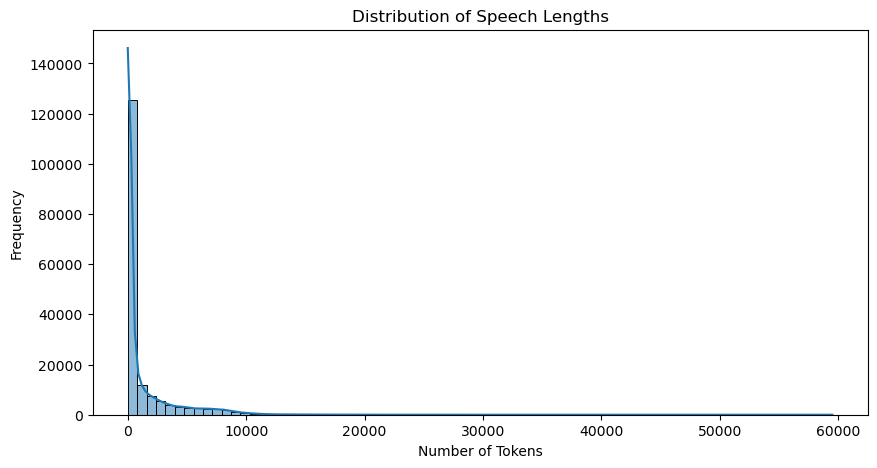

Most Common Words:
[('presidente', 142653), ('governo', 93488), ('votazione', 87617), ('stato', 81473), ('senatore', 73522), ('essere', 72504), ('legge', 69687), ('signor', 67966), ('senato', 56407), ('quindi', 55037), ('gruppo', 54928), ('fatto', 54839), ('parlare', 54397), ('paese', 52709), ('parte', 52422), ('senatori', 48915), ('solo', 48278), ('oggi', 48234), ('facoltà', 47584), ('fare', 45637)]


C:\Users\fabio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


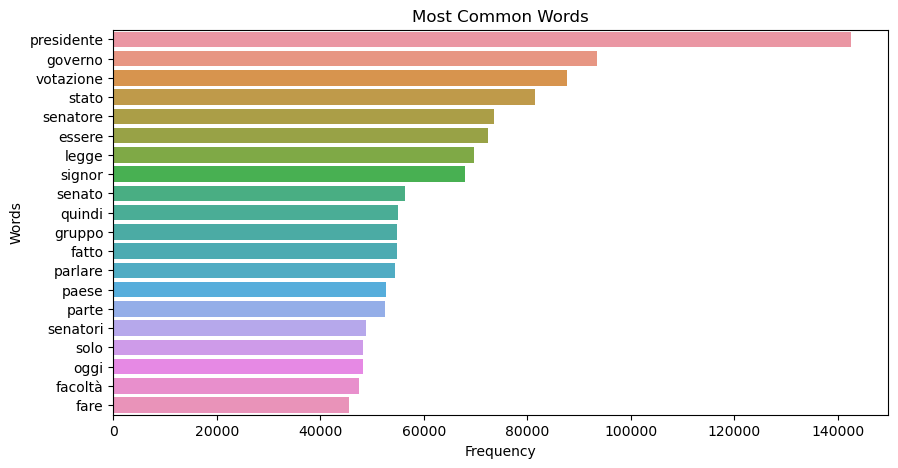

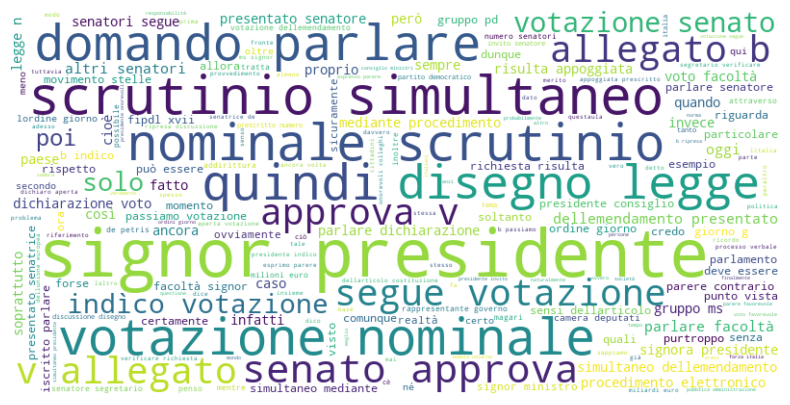

Most Common Bigrams:
[(('signor', 'presidente'), 58016), (('scrutinio', 'simultaneo'), 36618), (('votazione', 'nominale'), 33170), (('nominale', 'scrutinio'), 32863), (('domando', 'parlare'), 31021), (('disegno', 'legge'), 28027), (('senato', 'approva'), 27100), (('segue', 'votazione'), 26926), (('allegato', 'b'), 26891), (('v', 'allegato'), 26886), (('approva', 'v'), 26865), (('votazione', 'senato'), 26504), (('indìco', 'votazione'), 26111), (('dellemendamento', 'presentato'), 19184), (('parlare', 'facoltà'), 18662), (('altri', 'senatori'), 18236), (('simultaneo', 'dellemendamento'), 15599), (('signora', 'presidente'), 13982), (('dichiarazione', 'voto'), 13755), (('procedimento', 'elettronico'), 13280)]


In [173]:
texts_analysis(cond_merged_df)

#### Metadata Analysis

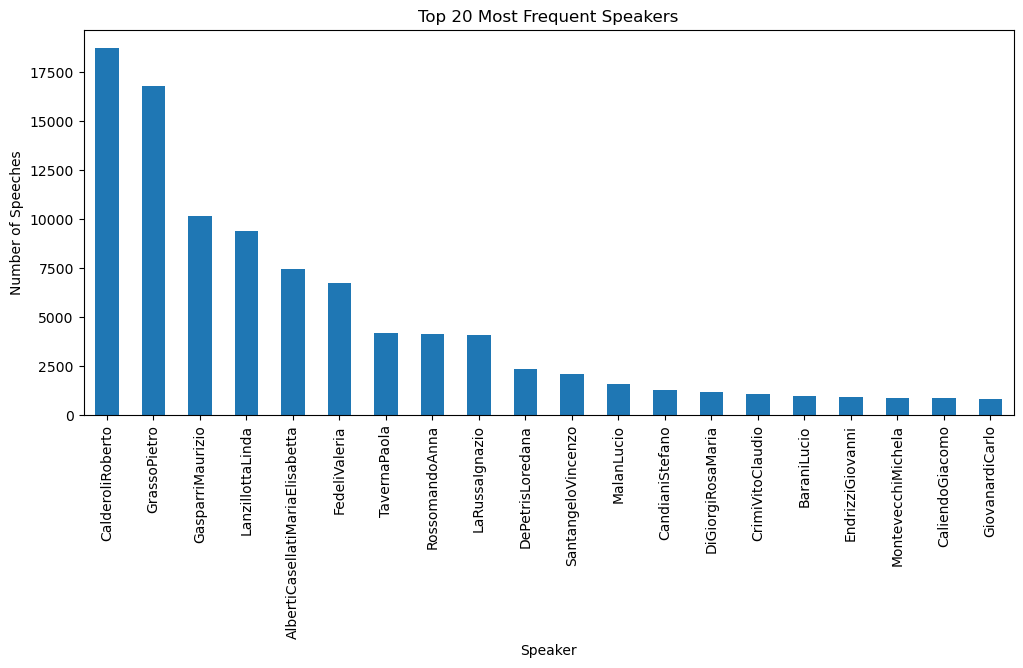

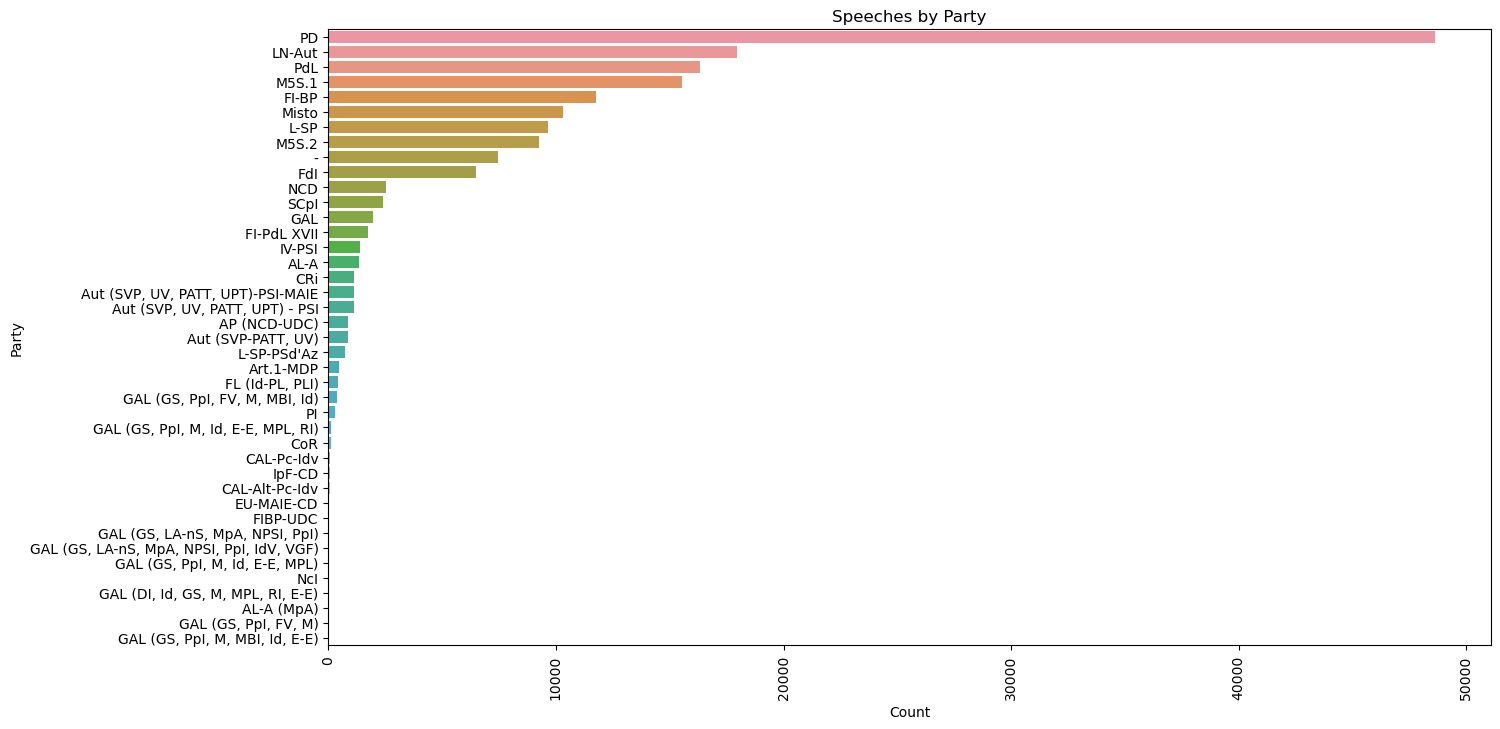

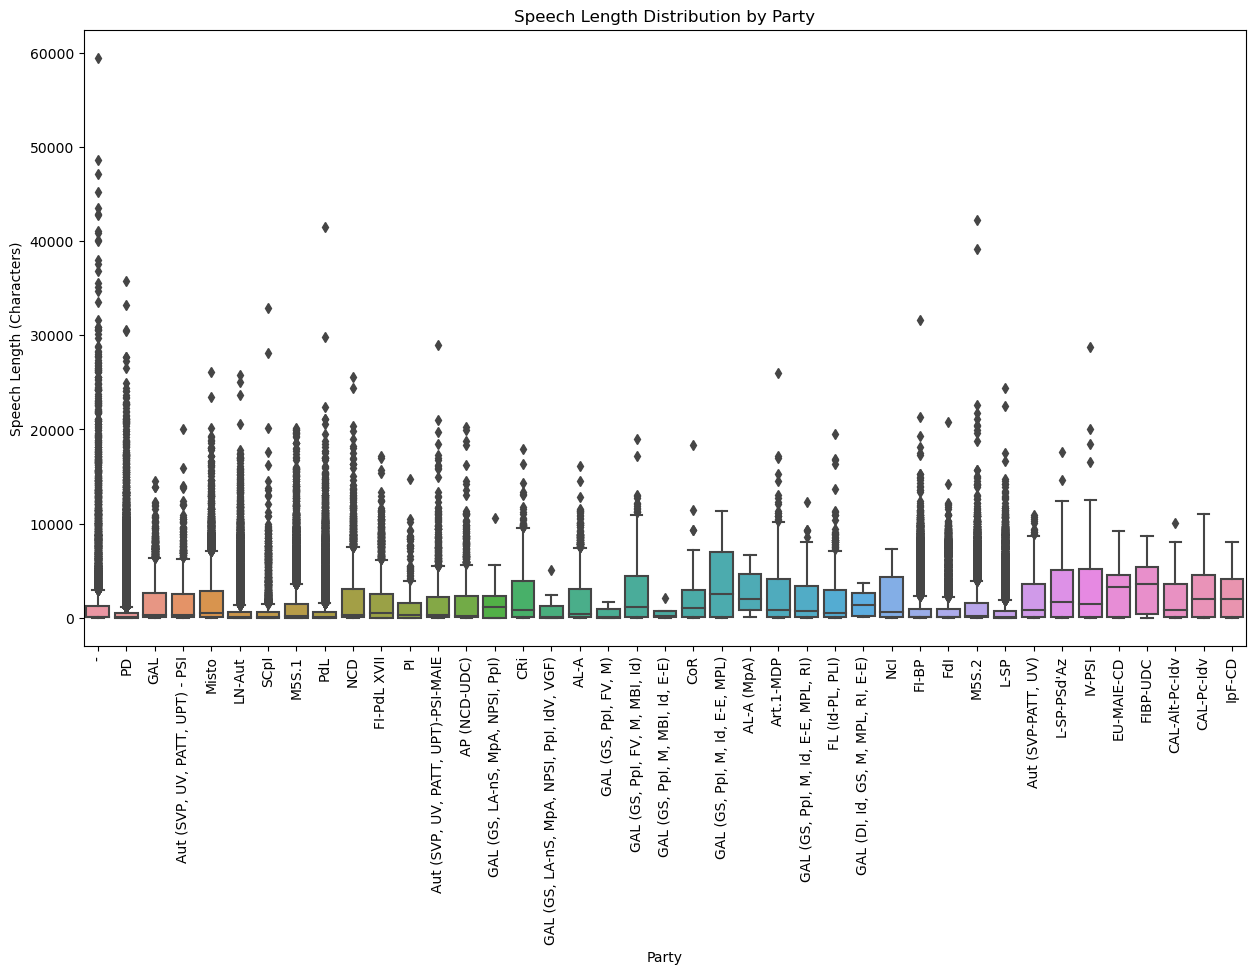

In [174]:
metadata_analysis(cond_merged_df)

# Cleaned dataset

#### Dataset structure

In [7]:
dataset_structure(merged_df)

====SHAPE====
  (10840, 14)

====DATA TYPES====
  ID                    object
Date                  object
Term                  object
Subcorpus             object
Speaker_minister      object
Speaker_party         object
Speaker_party_name    object
Party_status          object
Party_orientation     object
Speaker_ID            object
Speaker_gender        object
Speaker_birth          int64
text                  object
text_length            int64
dtype: object

====NULL VALUES====
  ID                    0
Date                  0
Term                  0
Subcorpus             0
Speaker_minister      0
Speaker_party         0
Speaker_party_name    0
Party_status          0
Party_orientation     0
Speaker_ID            0
Speaker_gender        0
Speaker_birth         0
text                  0
text_length           0
dtype: int64

====DUPLICATES====
 0


#### Text Analysis

====TEXT LENGTH INFO====
 count    10840.000000
mean      7504.411531
std       2665.136458
min       4500.000000
25%       5703.000000
50%       7021.000000
75%       8493.000000
max      42262.000000
Name: text_length, dtype: float64


C:\Users\fabio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


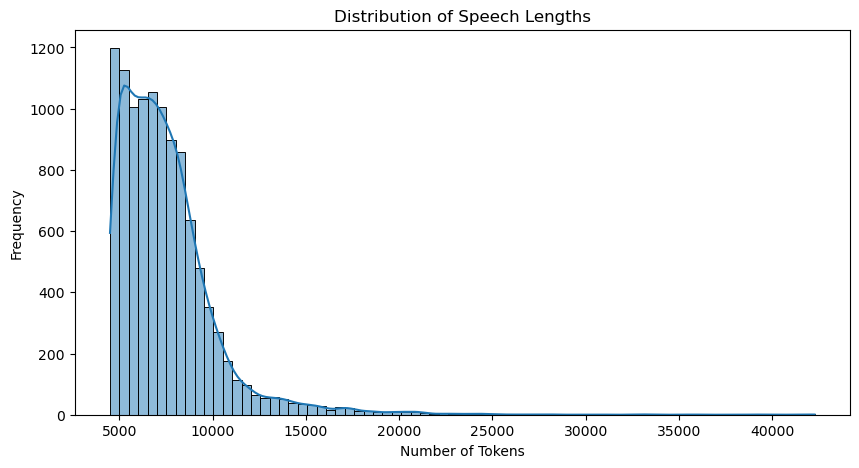

Most Common Words:
[('governo', 36825), ('presidente', 34231), ('stato', 32831), ('essere', 30803), ('legge', 26315), ('paese', 25715), ('fatto', 23666), ('oggi', 22439), ('solo', 21786), ('quindi', 21427), ('fare', 20460), ('parte', 20290), ('signor', 17726), ('lavoro', 17133), ('cè', 17090), ('poi', 16836), ('provvedimento', 16236), ('anni', 16032), ('ancora', 15941), ('già', 15801)]


C:\Users\fabio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


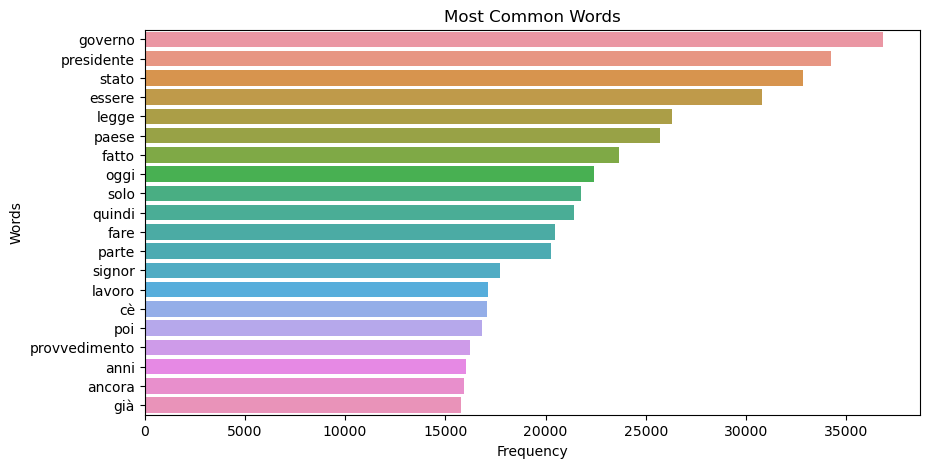

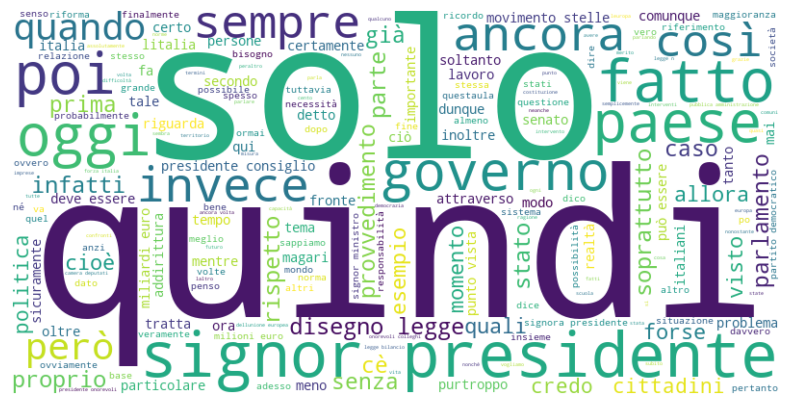

Most Common Bigrams:
[(('signor', 'presidente'), 13922), (('disegno', 'legge'), 7634), (('presidente', 'consiglio'), 4387), (('movimento', 'stelle'), 4035), (('deve', 'essere'), 3539), (('può', 'essere'), 3284), (('miliardi', 'euro'), 3281), (('punto', 'vista'), 3250), (('signora', 'presidente'), 3201), (('milioni', 'euro'), 3179), (('partito', 'democratico'), 2958), (('signor', 'ministro'), 2558), (('pubblica', 'amministrazione'), 2284), (('forza', 'italia'), 2119), (('onorevoli', 'colleghi'), 2103), (('dellunione', 'europea'), 2090), (('camera', 'deputati'), 2021), (('legge', 'n'), 1889), (('ancora', 'volta'), 1853), (('legge', 'bilancio'), 1827)]


In [8]:
texts_analysis(merged_df)

#### Metadata analysis

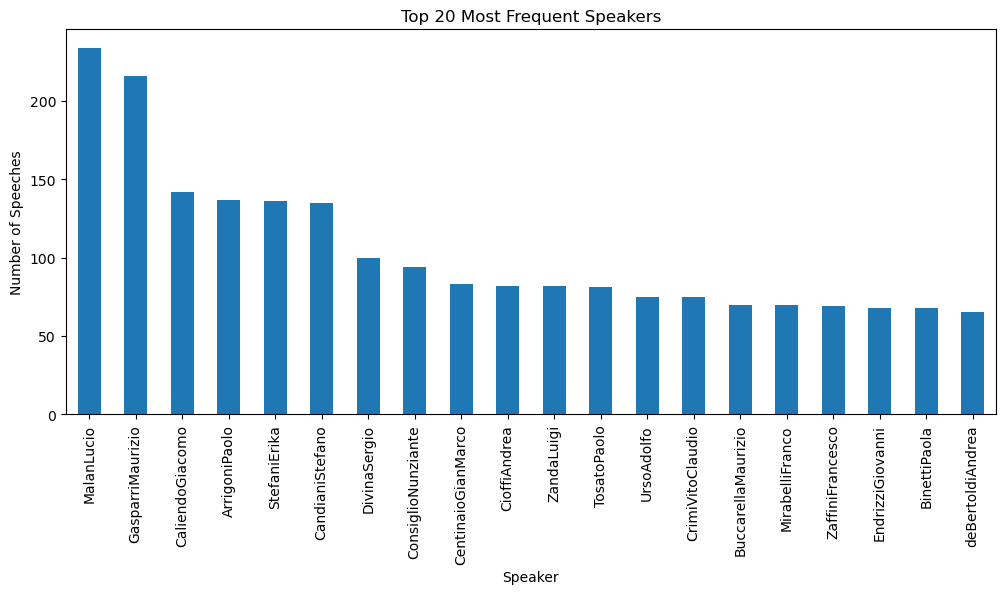

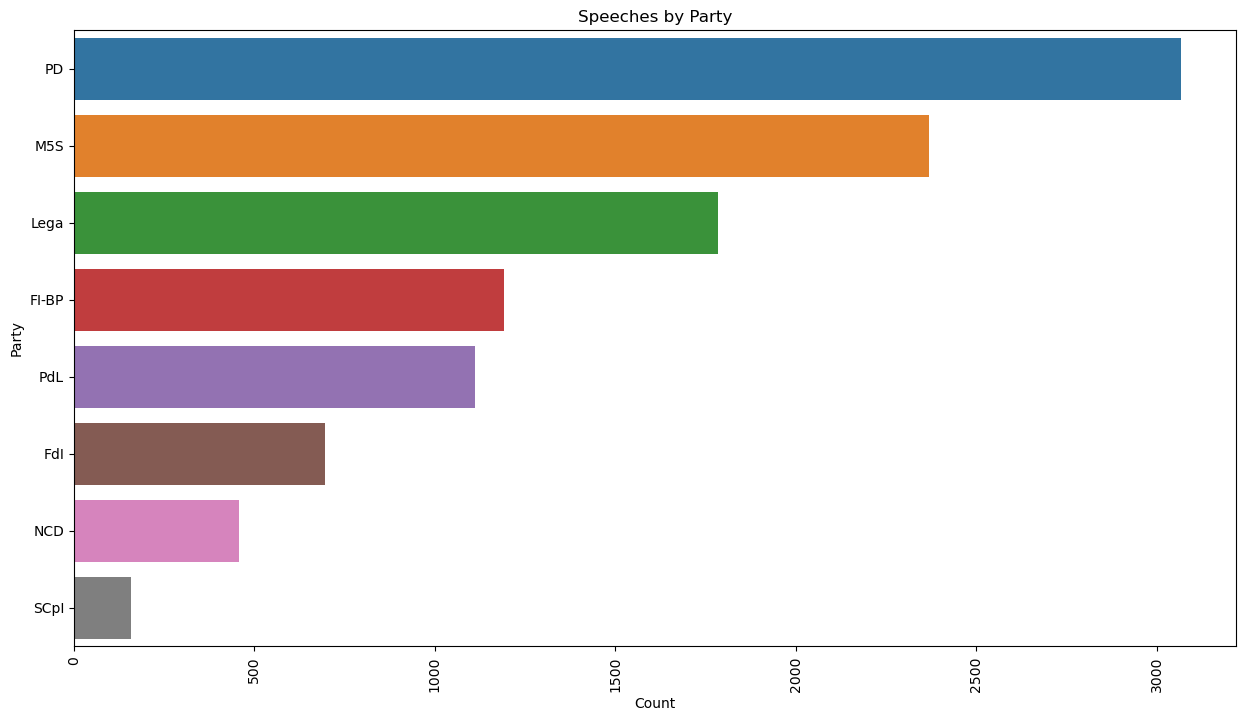

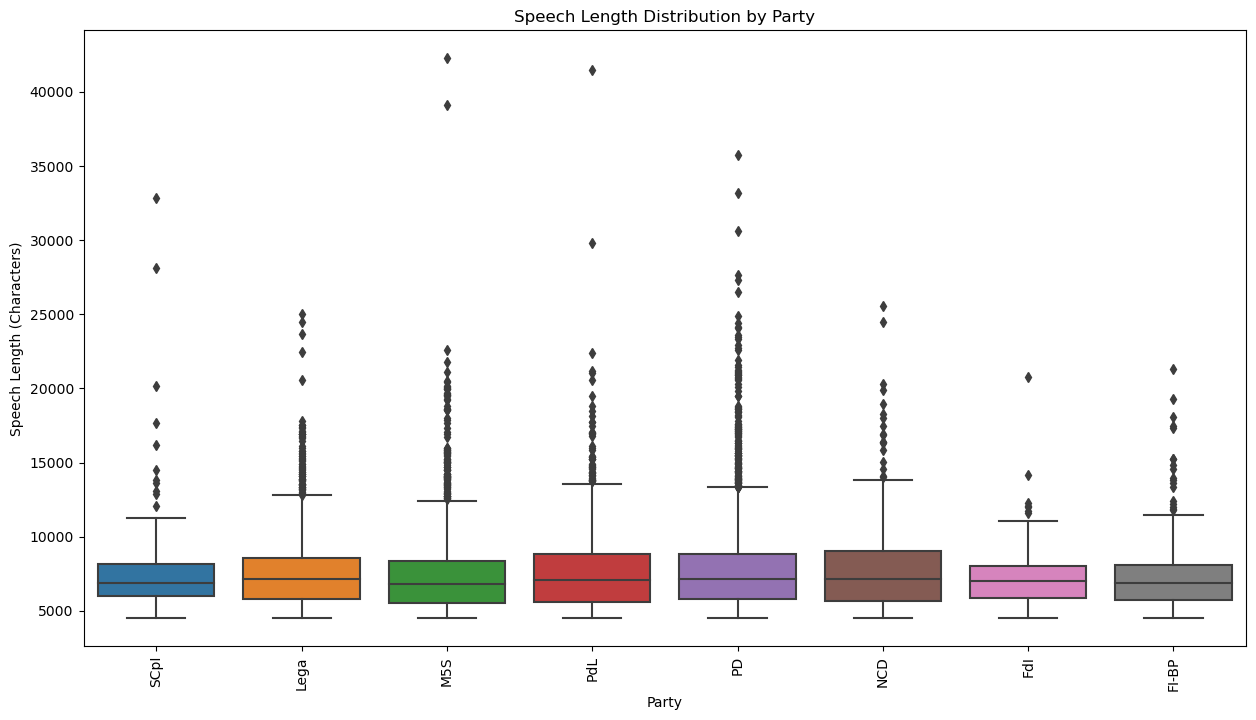

In [9]:
metadata_analysis(merged_df)